## 파이썬 들어가기

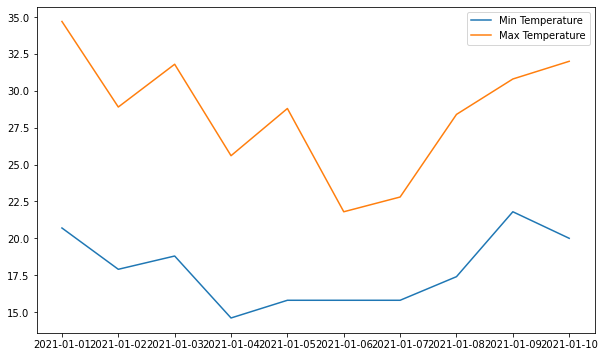

In [1]:
import matplotlib.pyplot as plt

dates = [
    '2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04', '2021-01-05',
    '2021-01-06', '2021-01-07', '2021-01-08', '2021-01-09', '2021-01-10'
]
min_temperature = [20.7, 17.9, 18.8, 14.6, 15.8, 15.8, 15.8, 17.4, 21.8, 20.0]
max_temperature = [34.7, 28.9, 31.8, 25.6, 28.8, 21.8, 22.8, 28.4, 30.8, 32.0]

fig,axes = plt.subplots(nrows=1, ncols=1, figsize=(10,6))
axes.plot(dates, min_temperature, label = 'Min Temperature')
axes.plot(dates, max_temperature, label = 'Max Temperature')
axes.legend()
plt.show()

In [2]:
print(fig)
print(axes)

Figure(720x432)
AxesSubplot(0.125,0.125;0.775x0.755)


## Matplotlib

### 선 그래프

#### 방법 1. Pyplot API

In [3]:
import fix_yahoo_finance as yf
data = yf.download('AAPL', '2019-08-01', '2020-08-01')
data.info()

[*********************100%***********************]  1 of 1 downloaded
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2019-08-01 to 2020-07-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       253 non-null    float64
 1   High       253 non-null    float64
 2   Low        253 non-null    float64
 3   Close      253 non-null    float64
 4   Adj Close  253 non-null    float64
 5   Volume     253 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


In [4]:
ts = data['Open']
print(ts.head())

Date
2019-08-01    53.474998
2019-08-02    51.382500
2019-08-05    49.497501
2019-08-06    49.077499
2019-08-07    48.852501
Name: Open, dtype: float64


[*********************100%***********************]  1 of 1 downloaded


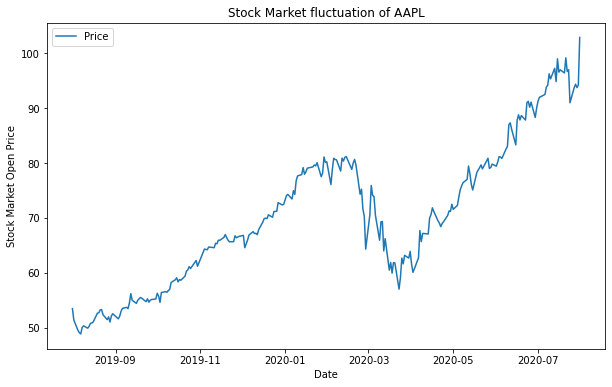

In [5]:
import fix_yahoo_finance as yf
import matplotlib.pyplot as plt

data = yf.download('AAPL', '2019-08-01', '2020-08-01')
ts = data['Open']
plt.figure(figsize=(10,6))
plt.plot(ts)
plt.legend(labels=['Price'], loc='best')
plt.title('Stock Market fluctuation of AAPL') 
plt.xlabel('Date') 
plt.ylabel('Stock Market Open Price') 
plt.show()

#### 방법 2. 객체지향 API


In [6]:
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure
import matplotlib.pyplot as plt

fig = Figure()

import numpy as np
np.random.seed(6)
x = np.random.randn(20000)

ax = fig.add_subplot(111)
ax.hist(x, 100)
ax.set_title('Artist Layer Histogram')
fig.savefig('Matplotlib_histogram.png')

### 방법 3. Pyplot API + 객체지향 API

[*********************100%***********************]  1 of 1 downloaded


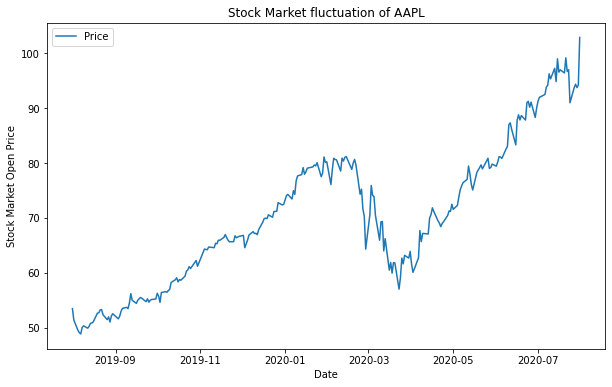

In [7]:
import fix_yahoo_finance as yf
import matplotlib.pyplot as plt

data = yf.download('AAPL', '2019-08-01', '2020-08-01')
ts = data['Open']

fig = plt.figure(figsize=(10, 6)) # 직접 Figure 객체 생성
ax= fig.subplots() # 직접 axes를 생성
ax.plot(ts) # 생성된 axes 에 대한 plot() 멤버 직접 호출 
ax.set_title('Stock Market fluctuation of AAPL')
ax.legend(labels=['Price'], loc='best')
ax.set_xlabel('Date')
ax.set_ylabel('Stock Market Open Price')
plt.show()

### 막대 그래프

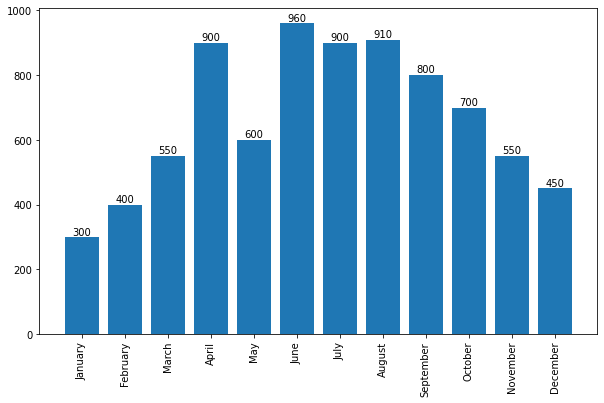

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import calendar

month_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
sold_list = [300, 400, 550, 900, 600, 960, 900, 910, 800, 700, 550, 450]

fig, ax = plt.subplots(figsize=(10,6))
plt.xticks(month_list, calendar.month_name[1:13], rotation=90)
plot = ax.bar(month_list, sold_list)
for rect in plot:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2., 1.002*height,'%d' % 
    int(height), ha='center', va='bottom')

plt.show()

### 산점도 그래프


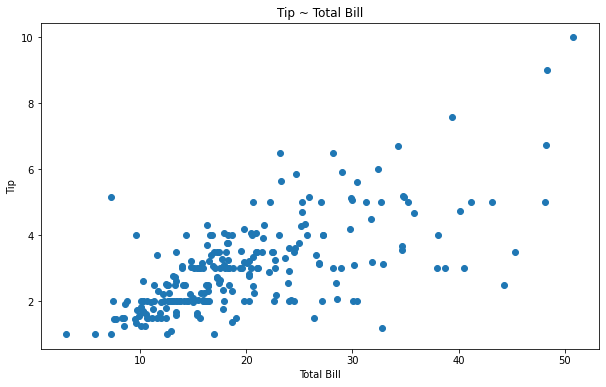

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

tips = sns.load_dataset("tips")
x = tips['total_bill']
y = tips['tip']

fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x, y)
ax.set_xlabel('Total Bill')
ax.set_ylabel('Tip')
ax.set_title('Tip ~ Total Bill')

fig.show()

In [10]:
label, data = tips.groupby('sex')

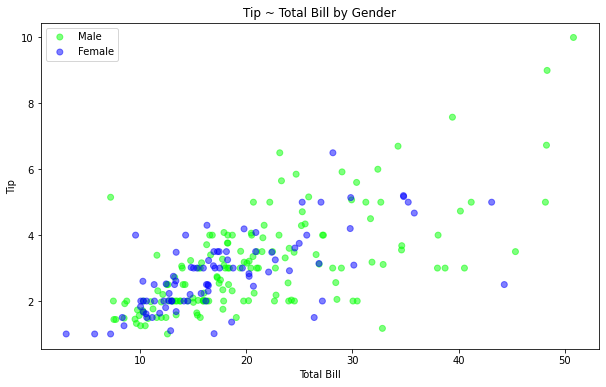

In [11]:
tips['sex_color'] = tips['sex'].map({"Female" : "#0000FF", "Male" : "#00FF00"})

fig, ax = plt.subplots(figsize=(10, 6))
for label, data in tips.groupby('sex'):
  ax.scatter(data['total_bill'], data['tip'], label=label, 
             color=data['sex_color'], alpha=0.5)
  ax.set_xlabel('Total Bill')
  ax.set_ylabel('Tip')
  ax.set_title('Tip ~ Total Bill by Gender')

ax.legend()
fig.show()

### 히스토그램


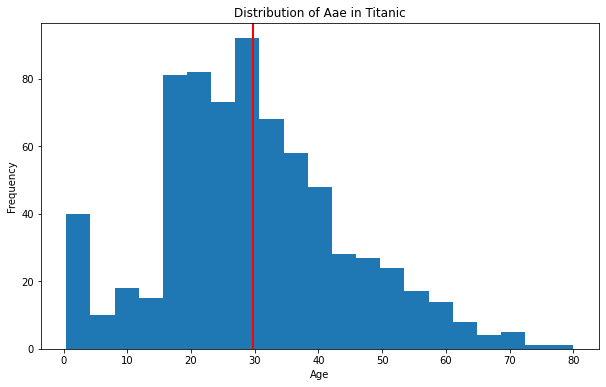

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

titanic = sns.load_dataset('titanic')
age = titanic['age']

nbins = 21
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(age, bins = nbins)
ax.set_xlabel("Age")
ax.set_ylabel("Frequency")
ax.set_title("Distribution of Aae in Titanic")
ax.axvline(x = age.mean(), linewidth = 2, color = 'r')
fig.show()

### 박스플롯

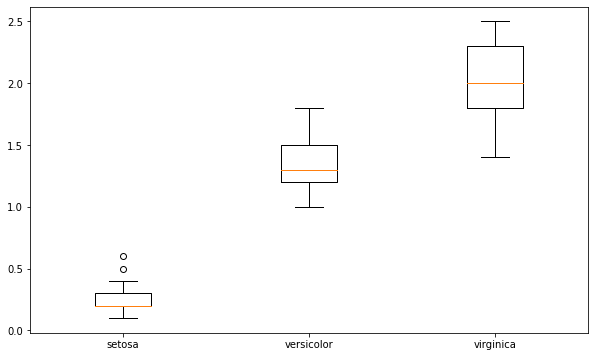

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

iris = sns.load_dataset('iris')

data = [iris[iris['species']=="setosa"]['petal_width'], 
        iris[iris['species']=="versicolor"]['petal_width'],
        iris[iris['species']=="virginica"]['petal_width']]

fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(data, labels=['setosa', 'versicolor', 'virginica'])

fig.show()

### 히트맵


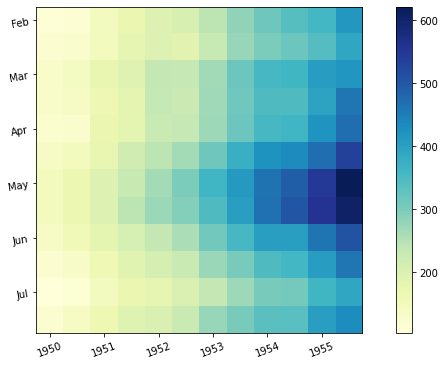

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

flights = sns.load_dataset("flights")
flights = flights.pivot("month", "year", "passengers")

fig, ax = plt.subplots(figsize=(12, 6))
im = ax.imshow(flights, cmap = 'YlGnBu')
ax.set_xticklabels(flights.columns, rotation = 20)
ax.set_yticklabels(flights.index, rotation = 10)
fig.colorbar(im)

fig.show()

## Seaborn

### 산점도와 회귀선이 있는 산점도

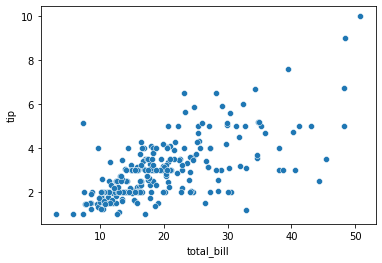

In [15]:
%matplotlib inline 

import matplotlib.pyplot as plt
import seaborn as sns

tips = sns.load_dataset("tips")

sns.scatterplot(x = "total_bill", y = "tip", data = tips)
plt.show()

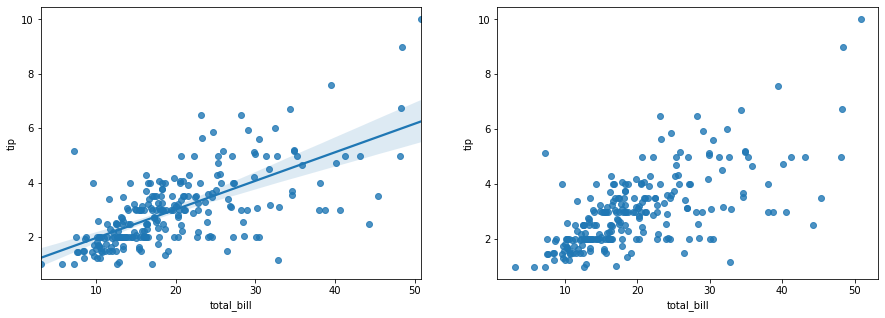

In [16]:

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(15, 5))

sns.regplot(x = "total_bill", 
            y = "tip", 
            data = tips, 
            ax = ax[0], 
            fit_reg = True)

sns.regplot(x = "total_bill", 
            y = "tip", 
            data = tips, 
            ax = ax[1], 
            fit_reg = False)

plt.show()

### 히스토그램/커널 밀도 그래프


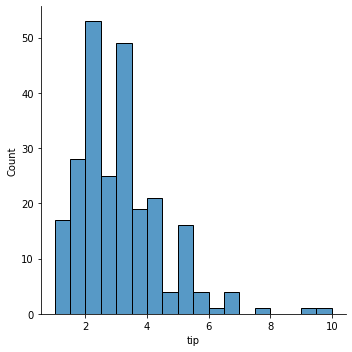

<Figure size 720x432 with 0 Axes>

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

tips = sns.load_dataset("tips")

sns.displot(x = "tip", data = tips)
plt.figure(figsize=(10, 6))
plt.show()

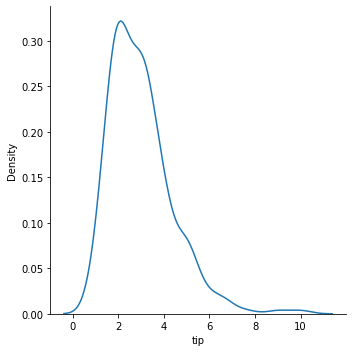

In [18]:
sns.displot(x="tip", kind="kde", data=tips)
plt.show()

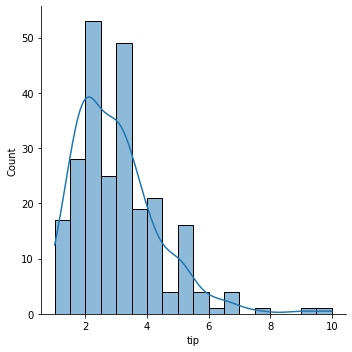

In [19]:
sns.displot(x="tip", kde=True, data=tips)
plt.show()

### 박스플롯

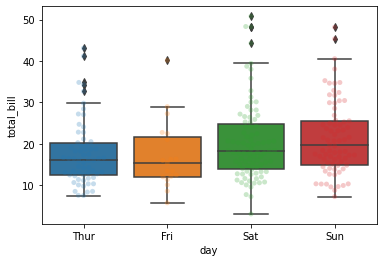

In [20]:
sns.boxplot(x = "day", y = "total_bill", data = tips)
sns.swarmplot(x = "day", y = "total_bill", data = tips, alpha = .25)
plt.show()

### 막대 그래프

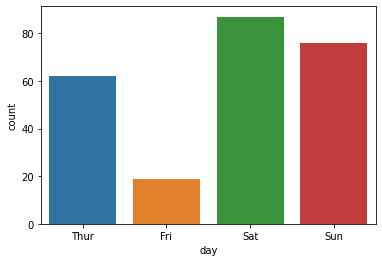

In [21]:
sns.countplot(x = "day", data = tips)
plt.show()

In [22]:
print(tips['day'].value_counts())
print("index: ", tips['day'].value_counts().index)
print("values: ", tips['day'].value_counts().values)

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64
index:  CategoricalIndex(['Sat', 'Sun', 'Thur', 'Fri'], categories=['Thur', 'Fri', 'Sat', 'Sun'], ordered=False, dtype='category')
values:  [87 76 62 19]


In [23]:
print(tips['day'].value_counts(ascending=True))

Fri     19
Thur    62
Sun     76
Sat     87
Name: day, dtype: int64


In [24]:
plt.show()

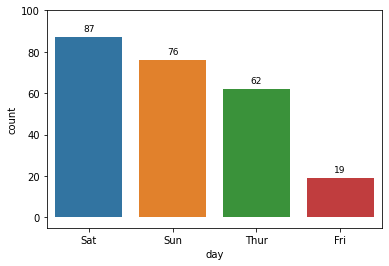

In [25]:
ax = sns.countplot(x = "day", data = tips, order = tips['day'].value_counts().index)
for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x() + p.get_width()/2., height+3, height, ha = 'center', size=9)
ax.set_ylim(-5, 100)
plt.show()

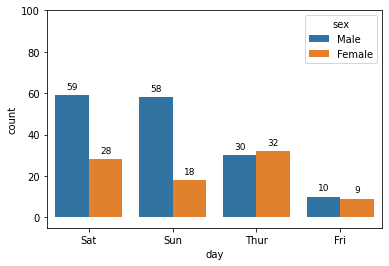

In [26]:
ax = sns.countplot(x = "day", data = tips, hue = "sex", dodge = True,
              order = tips['day'].value_counts().index)
for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x() + p.get_width()/2., height+3, height, ha = 'center', size=9)
ax.set_ylim(-5, 100)

plt.show()

### 상관관계 그래프

In [27]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

mpg = sns.load_dataset("mpg")
print(mpg.shape) # 398 행, 9개 열

num_mpg = mpg.select_dtypes(include = np.number)
print(num_mpg.shape) # 398 행, 7개 열

(398, 9)
(398, 7)


In [28]:
num_mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 21.9 KB


In [29]:
num_mpg.corr()

mpg  cylinders  ...  acceleration  model_year
mpg           1.000000  -0.775396  ...      0.420289    0.579267
cylinders    -0.775396   1.000000  ...     -0.505419   -0.348746
displacement -0.804203   0.950721  ...     -0.543684   -0.370164
horsepower   -0.778427   0.842983  ...     -0.689196   -0.416361
weight       -0.831741   0.896017  ...     -0.417457   -0.306564
acceleration  0.420289  -0.505419  ...      1.000000    0.288137
model_year    0.579267  -0.348746  ...      0.288137    1.000000

[7 rows x 7 columns]

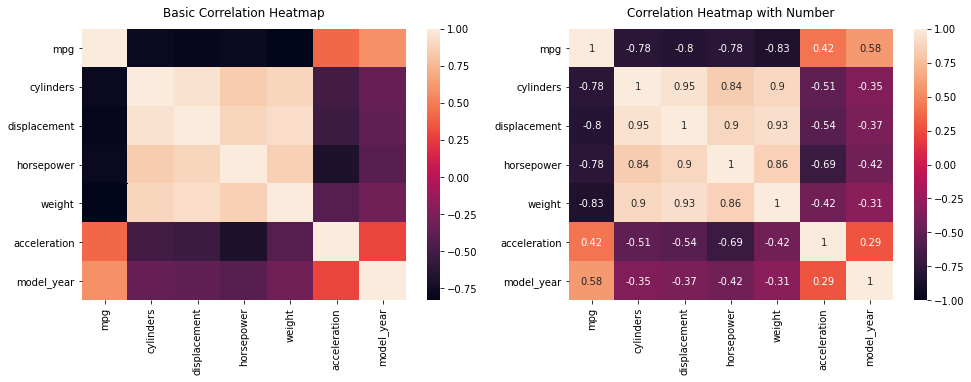

In [30]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(16, 5))

#  기본 그래프 [Basic Correlation Heatmap]
sns.heatmap(num_mpg.corr(), ax=ax[0])
ax[0].set_title('Basic Correlation Heatmap', pad = 12)

# 상관관계 수치 그래프 [Correlation Heatmap with Number]
sns.heatmap(num_mpg.corr(), vmin=-1, vmax=1, annot=True, ax=ax[1])
ax[1].set_title('Correlation Heatmap with Number', pad = 12)

plt.show()

In [31]:
print(int(True))
np.triu(np.ones_like(num_mpg.corr()))

1


array([[1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1.]])

In [32]:
mask = np.triu(np.ones_like(num_mpg.corr(), dtype=np.bool))
print(mask)

[[ True  True  True  True  True  True  True]
 [False  True  True  True  True  True  True]
 [False False  True  True  True  True  True]
 [False False False  True  True  True  True]
 [False False False False  True  True  True]
 [False False False False False  True  True]
 [False False False False False False  True]]


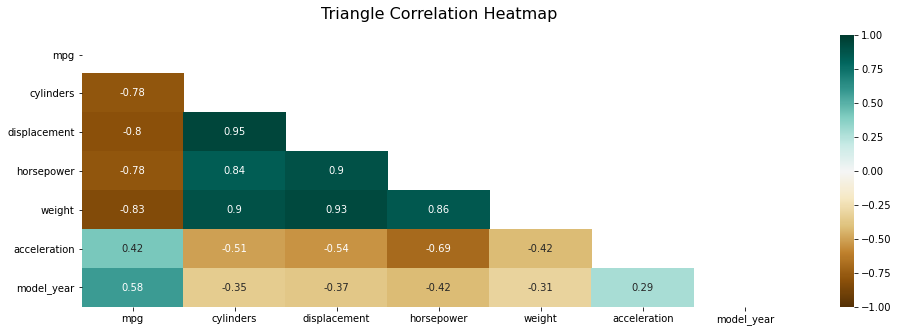

In [33]:
fig, ax = plt.subplots(figsize=(16, 5))

#  기본 그래프 [Basic Correlation Heatmap]
ax = sns.heatmap(num_mpg.corr(), mask=mask, 
                 vmin=-1, vmax = 1, 
                 annot=True, 
                 cmap="BrBG", cbar = True)
ax.set_title('Triangle Correlation Heatmap', pad = 16, size = 16)
fig.show()

## Intermediate

### 페가블로그 코드
- https://jehyunlee.github.io/2020/08/27/Python-DS-28-mpl_spines_grids/

In [34]:
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator, FuncFormatter)
import seaborn as sns
import numpy as np

In [35]:
def plot_example(ax, zorder=0):
    ax.bar(tips_day["day"], tips_day["tip"], color="lightgray", zorder=zorder)
    ax.set_title("tip (mean)", fontsize=16, pad=12)

    # Values
    h_pad = 0.1
    for i in range(4):
        fontweight = "normal"
        color = "k"
        if i == 3:
            fontweight = "bold"
            color = "darkred"

        ax.text(i, tips_day["tip"].loc[i] + h_pad, f"{tips_day['tip'].loc[i]:0.2f}", 
                horizontalalignment='center', fontsize=12, fontweight=fontweight, color=color)

    # Sunday
    ax.patches[3].set_facecolor("darkred")
    ax.patches[3].set_edgecolor("black")

    # set_range
    ax.set_ylim(0, 4)
    return ax

def major_formatter(x, pos):
    return "{%.2f}" % x
formatter = FuncFormatter(major_formatter)


In [36]:
tips = sns.load_dataset("tips")
tips_day = tips.groupby("day").mean().reset_index()
print(tips_day)

    day  total_bill       tip      size
0  Thur   17.682742  2.771452  2.451613
1   Fri   17.151579  2.734737  2.105263
2   Sat   20.441379  2.993103  2.517241
3   Sun   21.410000  3.255132  2.842105


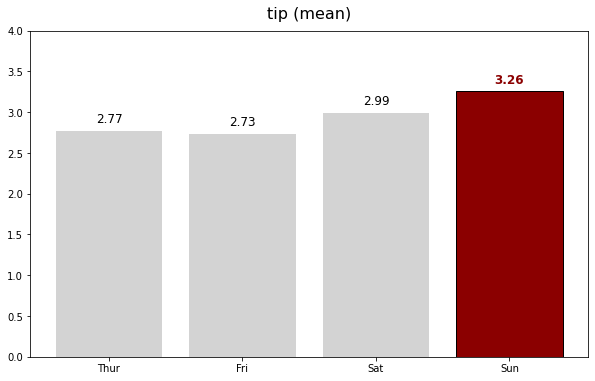

In [37]:
fig, ax = plt.subplots(figsize=(10, 6))
ax = plot_example(ax, zorder=2)

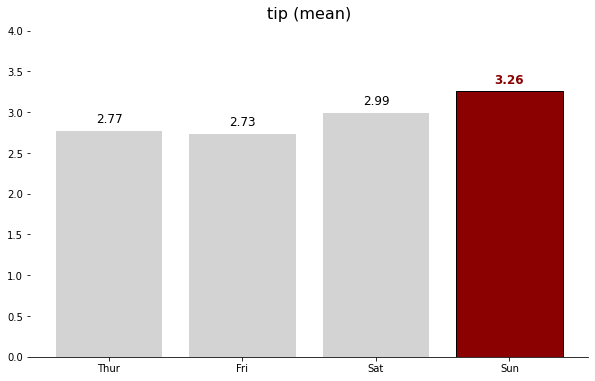

In [38]:
fig, ax = plt.subplots(figsize=(10, 6))
ax = plot_example(ax, zorder=2)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)

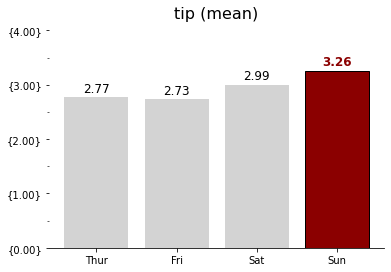

In [39]:
fig, ax = plt.subplots()
ax = plot_example(ax, zorder=2)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)

ax.yaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_major_formatter(formatter)
ax.yaxis.set_minor_locator(MultipleLocator(0.5))

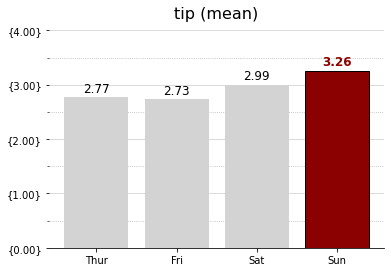

In [40]:
fig, ax = plt.subplots()
ax = plot_example(ax, zorder=2)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)

ax.yaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_major_formatter(formatter)
ax.yaxis.set_minor_locator(MultipleLocator(0.5))
    
ax.grid(axis="y", which="major", color="lightgray")
ax.grid(axis="y", which="minor", ls=":")

### 책 코드

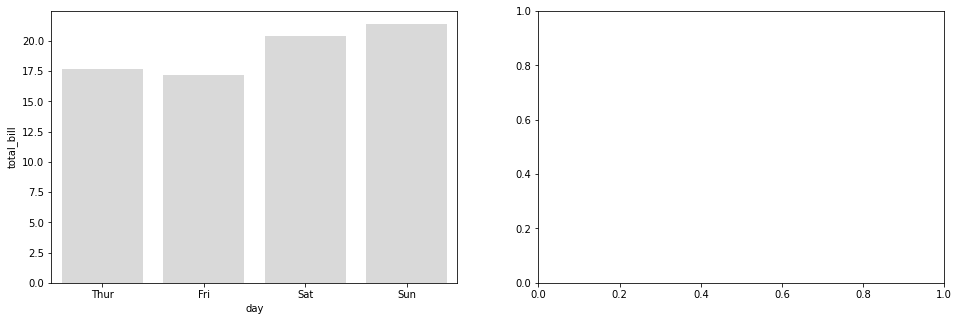

In [41]:
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator, FuncFormatter)
import seaborn as sns
import numpy as np

tips = sns.load_dataset("tips")
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(16, 5))

def major_formatter(x, pos):
    return "%.2f$" % x
formatter = FuncFormatter(major_formatter)

# Ideal Bar Graph
ax0 = sns.barplot(x = "day", y = 'total_bill', data = tips, 
                  ci=None, color='lightgray', alpha=0.85, zorder=2, 
                  ax=ax[0])

In [42]:
group_mean = tips.groupby(['day'])['total_bill'].agg('mean')
h_day = group_mean.sort_values(ascending=False).index[0]
h_mean = np.round(group_mean.sort_values(ascending=False)[0], 2)
print("The Best Day:", h_day)
print("The Highest Avg. Total Biil:", h_mean)

The Best Day: Sun
The Highest Avg. Total Biil: 21.41


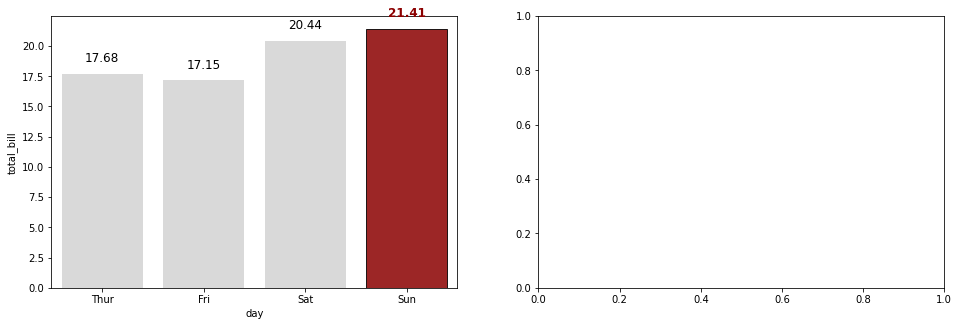

In [43]:
tips = sns.load_dataset("tips")
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(16, 5))

# Ideal Bar Graph
ax0 = sns.barplot(x = "day", y = 'total_bill', data = tips, 
                  ci=None, color='lightgray', alpha=0.85, zorder=2, 
                  ax=ax[0])

group_mean = tips.groupby(['day'])['total_bill'].agg('mean')
h_day = group_mean.sort_values(ascending=False).index[0]
h_mean = np.round(group_mean.sort_values(ascending=False)[0], 2)
for p in ax0.patches:
  fontweight = "normal"
  color = "k"
  height = np.round(p.get_height(), 2)
  if h_mean == height:
    fontweight="bold"
    color="darkred"
    p.set_facecolor(color)
    p.set_edgecolor("black")
  ax0.text(p.get_x() + p.get_width()/2., height+1, height, ha = 'center', size=12, fontweight=fontweight, color=color)

fig.show()

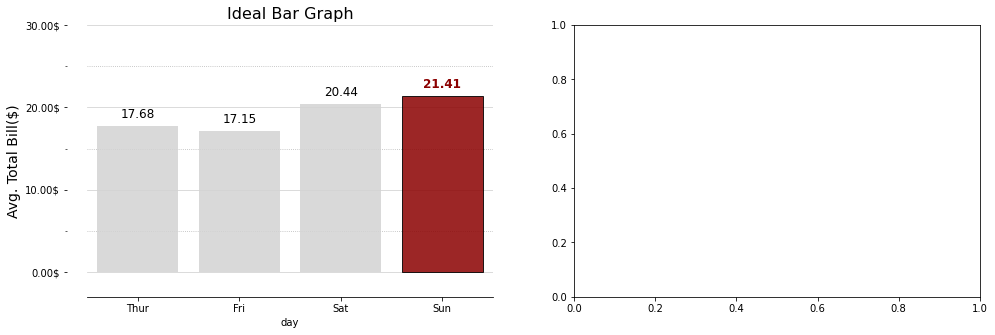

In [44]:
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator, FuncFormatter)
import seaborn as sns
import numpy as np

tips = sns.load_dataset("tips")
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(16, 5))

def major_formatter(x, pos):
    return "%.2f$" % x
formatter = FuncFormatter(major_formatter)

# Ideal Bar Graph
ax0 = sns.barplot(x = "day", y = 'total_bill', data = tips, 
                  ci=None, color='lightgray', alpha=0.85, zorder=2, 
                  ax=ax[0])

group_mean = tips.groupby(['day'])['total_bill'].agg('mean')
h_day = group_mean.sort_values(ascending=False).index[0]
h_mean = np.round(group_mean.sort_values(ascending=False)[0], 2)
for p in ax0.patches:
  fontweight = "normal"
  color = "k"
  height = np.round(p.get_height(), 2)
  if h_mean == height:
    fontweight="bold"
    color="darkred"
    p.set_facecolor(color)
    p.set_edgecolor("black")
  ax0.text(p.get_x() + p.get_width()/2., height+1, height, ha = 'center', size=12, fontweight=fontweight, color=color)

ax0.set_ylim(-3, 30)
ax0.set_title("Ideal Bar Graph", size = 16)

ax0.spines['top'].set_visible(False)
ax0.spines['left'].set_position(("outward", 20))
ax0.spines['left'].set_visible(False)
ax0.spines['right'].set_visible(False)

ax0.yaxis.set_major_locator(MultipleLocator(10))
ax0.yaxis.set_major_formatter(formatter)
ax0.yaxis.set_minor_locator(MultipleLocator(5))

ax0.set_ylabel("Avg. Total Bill($)", fontsize=14)

ax0.grid(axis="y", which="major", color="lightgray")
ax0.grid(axis="y", which="minor", ls=":")

fig.show()

Text(0, 0, 'Thur')
Text(0, 0, 'Fri')
Text(0, 0, 'Sat')
Text(0, 0, 'Sun')


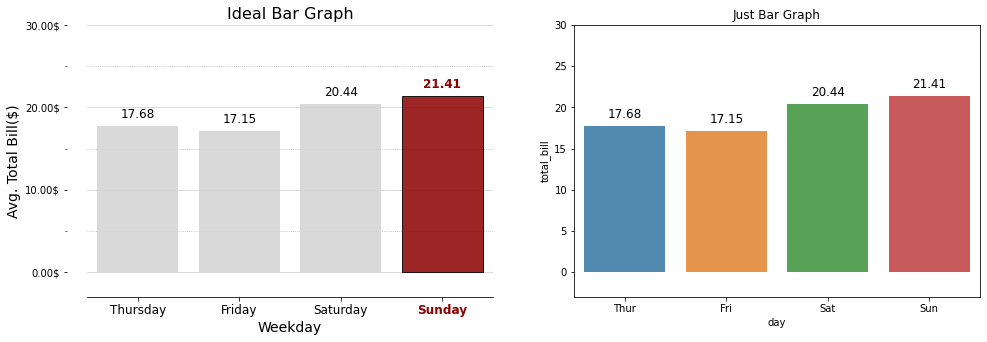

In [45]:
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator, FuncFormatter)
import seaborn as sns
import numpy as np

tips = sns.load_dataset("tips")
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(16, 5))

def major_formatter(x, pos):
    return "%.2f$" % x
formatter = FuncFormatter(major_formatter)

# Ideal Bar Graph
ax0 = sns.barplot(x = "day", y = 'total_bill', data = tips, 
                  ci=None, color='lightgray', alpha=0.85, zorder=2, 
                  ax=ax[0])

group_mean = tips.groupby(['day'])['total_bill'].agg('mean')
h_day = group_mean.sort_values(ascending=False).index[0]
h_mean = np.round(group_mean.sort_values(ascending=False)[0], 2)
for p in ax0.patches:
  fontweight = "normal"
  color = "k"
  height = np.round(p.get_height(), 2)
  if h_mean == height:
    fontweight="bold"
    color="darkred"
    p.set_facecolor(color)
    p.set_edgecolor("black")
  ax0.text(p.get_x() + p.get_width()/2., height+1, height, ha = 'center', size=12, fontweight=fontweight, color=color)

ax0.set_ylim(-3, 30)
ax0.set_title("Ideal Bar Graph", size = 16)

ax0.spines['top'].set_visible(False)
ax0.spines['left'].set_position(("outward", 20))
ax0.spines['left'].set_visible(False)
ax0.spines['right'].set_visible(False)

ax0.yaxis.set_major_locator(MultipleLocator(10))
ax0.yaxis.set_major_formatter(formatter)
ax0.yaxis.set_minor_locator(MultipleLocator(5))

ax0.set_ylabel("Avg. Total Bill($)", fontsize=14)

ax0.grid(axis="y", which="major", color="lightgray")
ax0.grid(axis="y", which="minor", ls=":")

ax0.set_xlabel("Weekday", fontsize=14)
for xtick in ax0.get_xticklabels():
  print(xtick)
  if xtick.get_text() == h_day:
    xtick.set_color("darkred")
    xtick.set_fontweight("demibold")
ax0.set_xticklabels(['Thursday', 'Friday', 'Saturday', 'Sunday'], size=12)

ax1 = sns.barplot(x = "day", y = 'total_bill', data = tips, 
                  ci=None, alpha=0.85, 
                  ax=ax[1])
for p in ax1.patches:
  height = np.round(p.get_height(), 2)
  ax1.text(p.get_x() + p.get_width()/2., height+1, height, ha = 'center', size=12)
ax1.set_ylim(-3, 30)
ax1.set_title("Just Bar Graph")

fig.show()